# Variable Augmentation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/My Drive/DCU/Practicum/lstm/cryptocurrency/merged_hourly.csv")

In [ ]:
df.head()

,timestamp,open,high,low,close,volume,xrp_vwap,eth_vwap
0,2022-02-13 12:00:00,42486.83,42648.93,42449.12,42500.69,14.678620,0.838640,2937.937500
1,2022-02-13 13:00:00,42512.77,42603.92,42416.94,42532.17,20.029563,0.836473,2940.258471
2,2022-02-13 14:00:00,42527.67,42717.34,42207.12,42554.96,28.868347,0.831675,2937.326872
3,2022-02-13 15:00:00,42533.60,42779.60,42514.50,42597.08,19.760018,0.828943,2934.163471
4,2022-02-13 16:00:00,42600.59,42607.53,42235.62,42348.63,29.558816,0.826687,2919.072788


In [ ]:
df2 = df.copy()

In [ ]:
df2.head()

,timestamp,open,high,low,close,volume,xrp_vwap,eth_vwap
0,2022-02-13 12:00:00,42486.83,42648.93,42449.12,42500.69,14.678620,0.838640,2937.937500
1,2022-02-13 13:00:00,42512.77,42603.92,42416.94,42532.17,20.029563,0.836473,2940.258471
2,2022-02-13 14:00:00,42527.67,42717.34,42207.12,42554.96,28.868347,0.831675,2937.326872
3,2022-02-13 15:00:00,42533.60,42779.60,42514.50,42597.08,19.760018,0.828943,2934.163471
4,2022-02-13 16:00:00,42600.59,42607.53,42235.62,42348.63,29.558816,0.826687,2919.072788


## MACD = EMA(12) - EMA(26)
## Signal = EMA(9)

In [ ]:
# using TP to calculate MACD
df2['tp'] = (df2['high'] + df2['low'] + df2['close']) / 3
df2.head()

,timestamp,open,high,low,close,volume,xrp_vwap,eth_vwap,tp
0,2022-02-13 12:00:00,42486.83,42648.93,42449.12,42500.69,14.678620,0.838640,2937.937500,42532.913333
1,2022-02-13 13:00:00,42512.77,42603.92,42416.94,42532.17,20.029563,0.836473,2940.258471,42517.676667
2,2022-02-13 14:00:00,42527.67,42717.34,42207.12,42554.96,28.868347,0.831675,2937.326872,42493.140000
3,2022-02-13 15:00:00,42533.60,42779.60,42514.50,42597.08,19.760018,0.828943,2934.163471,42630.393333
4,2022-02-13 16:00:00,42600.59,42607.53,42235.62,42348.63,29.558816,0.826687,2919.072788,42397.260000


In [ ]:
df2['ema12'] = df2['tp'].ewm(span=12, adjust=False).mean()

In [ ]:
df2.head()

,timestamp,open,high,low,close,volume,xrp_vwap,eth_vwap,tp,ema12
0,2022-02-13 12:00:00,42486.83,42648.93,42449.12,42500.69,14.678620,0.838640,2937.937500,42532.913333,42532.913333
1,2022-02-13 13:00:00,42512.77,42603.92,42416.94,42532.17,20.029563,0.836473,2940.258471,42517.676667,42530.569231
2,2022-02-13 14:00:00,42527.67,42717.34,42207.12,42554.96,28.868347,0.831675,2937.326872,42493.140000,42524.810888
3,2022-02-13 15:00:00,42533.60,42779.60,42514.50,42597.08,19.760018,0.828943,2934.163471,42630.393333,42541.054341
4,2022-02-13 16:00:00,42600.59,42607.53,42235.62,42348.63,29.558816,0.826687,2919.072788,42397.260000,42518.932134


In [ ]:
df2['ema26'] = df2['tp'].ewm(span=26, adjust=False).mean()

In [ ]:
df2['macd'] = df2['ema12'] - df2['ema26']

In [ ]:
df2.head()

,timestamp,open,high,low,close,volume,xrp_vwap,eth_vwap,tp,ema12,ema26,macd
0,2022-02-13 12:00:00,42486.83,42648.93,42449.12,42500.69,14.678620,0.838640,2937.937500,42532.913333,42532.913333,42532.913333,0.000000
1,2022-02-13 13:00:00,42512.77,42603.92,42416.94,42532.17,20.029563,0.836473,2940.258471,42517.676667,42530.569231,42531.784691,-1.215461
2,2022-02-13 14:00:00,42527.67,42717.34,42207.12,42554.96,28.868347,0.831675,2937.326872,42493.140000,42524.810888,42528.922122,-4.111234
3,2022-02-13 15:00:00,42533.60,42779.60,42514.50,42597.08,19.760018,0.828943,2934.163471,42630.393333,42541.054341,42536.438508,4.615833
4,2022-02-13 16:00:00,42600.59,42607.53,42235.62,42348.63,29.558816,0.826687,2919.072788,42397.260000,42518.932134,42526.128989,-7.196854


In [ ]:
df2['signal_line'] = df2['macd'].ewm(span=9).mean()

In [ ]:
df2.head()

,timestamp,open,high,low,close,volume,xrp_vwap,eth_vwap,tp,ema12,ema26,macd,signal_line
0,2022-02-13 12:00:00,42486.83,42648.93,42449.12,42500.69,14.678620,0.838640,2937.937500,42532.913333,42532.913333,42532.913333,0.000000,0.000000
1,2022-02-13 13:00:00,42512.77,42603.92,42416.94,42532.17,20.029563,0.836473,2940.258471,42517.676667,42530.569231,42531.784691,-1.215461,-0.675256
2,2022-02-13 14:00:00,42527.67,42717.34,42207.12,42554.96,28.868347,0.831675,2937.326872,42493.140000,42524.810888,42528.922122,-4.111234,-2.083444
3,2022-02-13 15:00:00,42533.60,42779.60,42514.50,42597.08,19.760018,0.828943,2934.163471,42630.393333,42541.054341,42536.438508,4.615833,0.185959
4,2022-02-13 16:00:00,42600.59,42607.53,42235.62,42348.63,29.558816,0.826687,2919.072788,42397.260000,42518.932134,42526.128989,-7.196854,-2.010261


In [ ]:
df2.set_index('timestamp', inplace=True)

In [ ]:
df2.head()

,open,high,low,close,volume,xrp_vwap,eth_vwap,tp,ema12,ema26,macd,signal_line
timestamp,,,,,,,,,,,,
2022-02-13 12:00:00,42486.83,42648.93,42449.12,42500.69,14.678620,0.838640,2937.937500,42532.913333,42532.913333,42532.913333,0.000000,0.000000
2022-02-13 13:00:00,42512.77,42603.92,42416.94,42532.17,20.029563,0.836473,2940.258471,42517.676667,42530.569231,42531.784691,-1.215461,-0.675256
2022-02-13 14:00:00,42527.67,42717.34,42207.12,42554.96,28.868347,0.831675,2937.326872,42493.140000,42524.810888,42528.922122,-4.111234,-2.083444
2022-02-13 15:00:00,42533.60,42779.60,42514.50,42597.08,19.760018,0.828943,2934.163471,42630.393333,42541.054341,42536.438508,4.615833,0.185959
2022-02-13 16:00:00,42600.59,42607.53,42235.62,42348.63,29.558816,0.826687,2919.072788,42397.260000,42518.932134,42526.128989,-7.196854,-2.010261


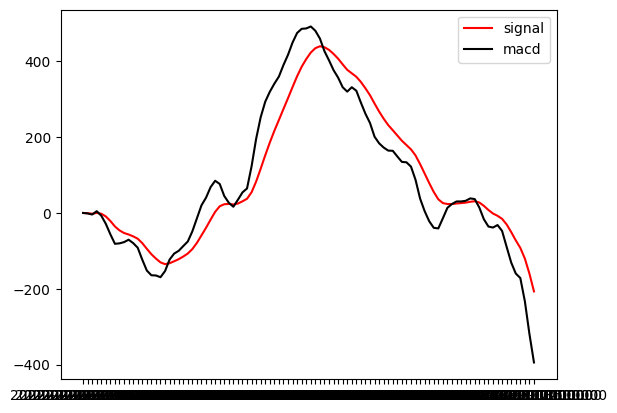

In [ ]:
plt.plot(df2.index[:100], df2.signal_line[:100],  label='signal', color='red')
plt.plot(df2.index[:100], df2.macd[:100],  label='macd', color='black')
plt.legend()
plt.show()

## middle band = sma(20)
## upper band = sma + 2std
## lower band = sma - 2std

In [ ]:
df2['sma'] = df2.tp.rolling(window=20).mean()

In [ ]:
df2['std'] = df2.tp.rolling(window=20).std()

In [ ]:
df2['upper_band'] = df2['sma'] + df2['std'] * 2
df2['lower_band'] = df2['sma'] - df2['std'] * 2

In [ ]:
df2.tail()

,open,high,low,close,volume,xrp_vwap,eth_vwap,tp,ema12,ema26,macd,signal_line,sma,std,upper_band,lower_band
timestamp,,,,,,,,,,,,,,,,
2025-02-12 08:00:00,96058.0,96434.0,96055.0,96350.0,20.404847,2.402512,2603.661341,96279.666667,95947.757111,96294.914171,-347.157060,-424.541656,95987.200000,564.786876,97116.773752,94857.626248
2025-02-12 09:00:00,96353.0,96356.0,96030.0,96125.0,8.375477,2.404548,2605.944509,96170.333333,95981.999607,96285.685961,-303.686354,-400.370596,95938.716667,498.327592,96935.371851,94942.061482
2025-02-12 10:00:00,96124.0,96195.0,95917.0,95977.0,27.868397,2.404944,2608.004687,96029.666667,95989.333001,96266.721569,-277.388568,-375.774190,95891.583333,436.116526,96763.816386,95019.350281
2025-02-12 11:00:00,95976.0,96355.0,95976.0,96083.0,37.066567,2.406846,2609.666888,96138.000000,96012.204847,96257.186638,-244.981791,-349.615710,95849.683333,360.073408,96569.830150,95129.536517
2025-02-12 12:00:00,96120.0,96352.0,96114.0,96335.0,1.702001,2.409158,2611.675339,96267.000000,96051.404101,96257.913554,-206.509453,-320.994459,95835.116667,334.909961,96504.936588,95165.296746


In [ ]:
df2.head()

,open,high,low,close,volume,xrp_vwap,eth_vwap,tp,ema12,ema26,macd,signal_line,sma,std,upper_band,lower_band
timestamp,,,,,,,,,,,,,,,,
2022-02-13 12:00:00,42486.83,42648.93,42449.12,42500.69,14.678620,0.838640,2937.937500,42532.913333,42532.913333,42532.913333,0.000000,0.000000,NaN,NaN,NaN,NaN
2022-02-13 13:00:00,42512.77,42603.92,42416.94,42532.17,20.029563,0.836473,2940.258471,42517.676667,42530.569231,42531.784691,-1.215461,-0.675256,NaN,NaN,NaN,NaN
2022-02-13 14:00:00,42527.67,42717.34,42207.12,42554.96,28.868347,0.831675,2937.326872,42493.140000,42524.810888,42528.922122,-4.111234,-2.083444,NaN,NaN,NaN,NaN
2022-02-13 15:00:00,42533.60,42779.60,42514.50,42597.08,19.760018,0.828943,2934.163471,42630.393333,42541.054341,42536.438508,4.615833,0.185959,NaN,NaN,NaN,NaN
2022-02-13 16:00:00,42600.59,42607.53,42235.62,42348.63,29.558816,0.826687,2919.072788,42397.260000,42518.932134,42526.128989,-7.196854,-2.010261,NaN,NaN,NaN,NaN


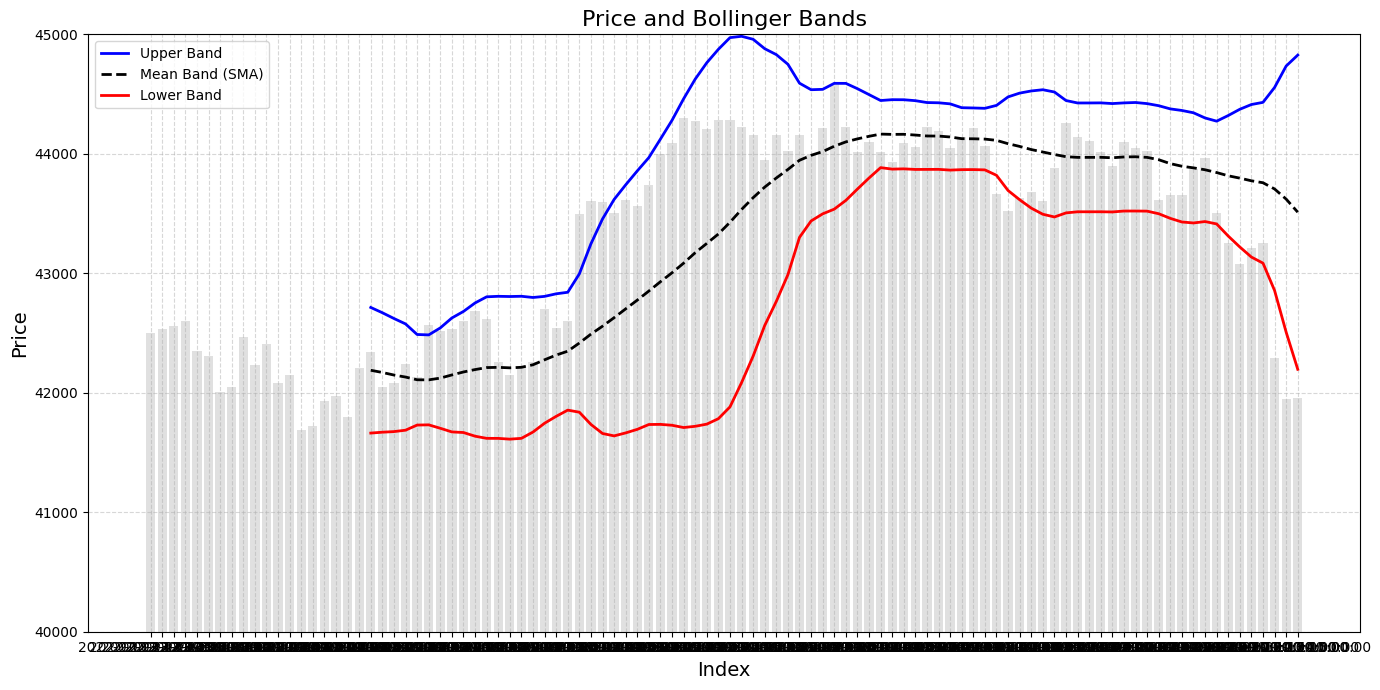

In [ ]:
# 그래프 크기 설정
plt.figure(figsize=(14, 7))

# 바 차트 그리기 (Close 가격)
sns.barplot(x=df2.index[:100], y=df2['close'][:100], color='lightgray', alpha=0.7)

# 선 그래프 그리기 (상한선, 평균선, 하한선)
plt.plot(df2.index[:100], df2['upper_band'][:100], label='Upper Band', color='blue', linewidth=2)
plt.plot(df2.index[:100], df2['sma'][:100], label='Mean Band (SMA)', color='black', linestyle='--', linewidth=2)
plt.plot(df2.index[:100], df2['lower_band'][:100], label='Lower Band', color='red', linewidth=2)

# 그래프 제목 및 레이블 설정
plt.title('Price and Bollinger Bands', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Price', fontsize=14)

# y축 범위 설정
plt.ylim(40000, 45000)

# 범례 추가
plt.legend()

# 격자 표시
plt.grid(visible=True, linestyle='--', alpha=0.5)

# 그래프 출력
plt.tight_layout()  # 레이아웃 자동 조정
plt.show()

In [ ]:
df3 = df2[20:]

In [ ]:
df3.head()

,open,high,low,close,volume,xrp_vwap,eth_vwap,tp,ema12,ema26,macd,signal_line,sma,std,upper_band,lower_band
timestamp,,,,,,,,,,,,,,,,
2022-02-14 08:00:00,42337.26,42438.52,42010.37,42044.94,56.369935,0.791332,2860.850895,42164.610000,42094.273727,42201.455031,-107.181304,-127.447998,42169.888167,250.000006,42669.888178,41669.888155
2022-02-14 09:00:00,42025.77,42233.52,41947.21,42079.28,217.707225,0.789190,2860.060337,42086.670000,42093.103923,42192.952436,-99.848513,-121.887069,42148.337833,236.663223,42621.664279,41675.011387
2022-02-14 10:00:00,42080.87,42297.12,41935.36,42237.62,24.379766,0.789136,2860.683520,42156.700000,42102.887935,42190.267071,-87.379136,-114.944501,42131.515833,222.391539,42576.298912,41686.732754
2022-02-14 11:00:00,42257.62,42295.21,42096.56,42132.13,29.536714,0.789170,2861.301491,42174.633333,42113.925688,42189.109016,-75.183328,-106.954534,42108.727833,189.500235,42487.728302,41729.727364
2022-02-14 12:00:00,42119.28,42616.29,41961.66,42564.06,68.559400,0.790173,2868.380088,42380.670000,42154.963275,42203.298719,-48.335444,-95.186257,42107.898333,188.202636,42484.303604,41731.493062


In [ ]:
features = ['close', 'xrp_vwap', 'eth_vwap', 'macd', 'signal_line', 'sma', 'upper_band', 'lower_band']
df4 = df3[features]

In [ ]:
df4.head()

,close,xrp_vwap,eth_vwap,macd,signal_line,sma,upper_band,lower_band
timestamp,,,,,,,,
2022-02-14 08:00:00,42044.94,0.791332,2860.850895,-107.181304,-127.447998,42169.888167,42669.888178,41669.888155
2022-02-14 09:00:00,42079.28,0.789190,2860.060337,-99.848513,-121.887069,42148.337833,42621.664279,41675.011387
2022-02-14 10:00:00,42237.62,0.789136,2860.683520,-87.379136,-114.944501,42131.515833,42576.298912,41686.732754
2022-02-14 11:00:00,42132.13,0.789170,2861.301491,-75.183328,-106.954534,42108.727833,42487.728302,41729.727364
2022-02-14 12:00:00,42564.06,0.790173,2868.380088,-48.335444,-95.186257,42107.898333,42484.303604,41731.493062


In [ ]:
df4.shape

(26261, 8)

In [ ]:
df4['y'] = df4['close'].diff().apply(lambda x: 1 if x > 0 else 0)

<ipython-input-29-7a362c0be2ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['y'] = df4['close'].diff().apply(lambda x: 1 if x > 0 else 0)


In [ ]:
df4.head()

,close,xrp_vwap,eth_vwap,macd,signal_line,sma,upper_band,lower_band,y
timestamp,,,,,,,,,
2022-02-14 08:00:00,42044.94,0.791332,2860.850895,-107.181304,-127.447998,42169.888167,42669.888178,41669.888155,0
2022-02-14 09:00:00,42079.28,0.789190,2860.060337,-99.848513,-121.887069,42148.337833,42621.664279,41675.011387,1
2022-02-14 10:00:00,42237.62,0.789136,2860.683520,-87.379136,-114.944501,42131.515833,42576.298912,41686.732754,1
2022-02-14 11:00:00,42132.13,0.789170,2861.301491,-75.183328,-106.954534,42108.727833,42487.728302,41729.727364,0
2022-02-14 12:00:00,42564.06,0.790173,2868.380088,-48.335444,-95.186257,42107.898333,42484.303604,41731.493062,1


In [ ]:
df4 = df4.iloc[1:]
df4.head()

,close,xrp_vwap,eth_vwap,macd,signal_line,sma,upper_band,lower_band,y
timestamp,,,,,,,,,
2022-02-14 09:00:00,42079.28,0.789190,2860.060337,-99.848513,-121.887069,42148.337833,42621.664279,41675.011387,1
2022-02-14 10:00:00,42237.62,0.789136,2860.683520,-87.379136,-114.944501,42131.515833,42576.298912,41686.732754,1
2022-02-14 11:00:00,42132.13,0.789170,2861.301491,-75.183328,-106.954534,42108.727833,42487.728302,41729.727364,0
2022-02-14 12:00:00,42564.06,0.790173,2868.380088,-48.335444,-95.186257,42107.898333,42484.303604,41731.493062,1
2022-02-14 13:00:00,42517.32,0.791054,2876.725693,-13.988806,-78.897537,42122.876667,42542.908537,41702.844796,0


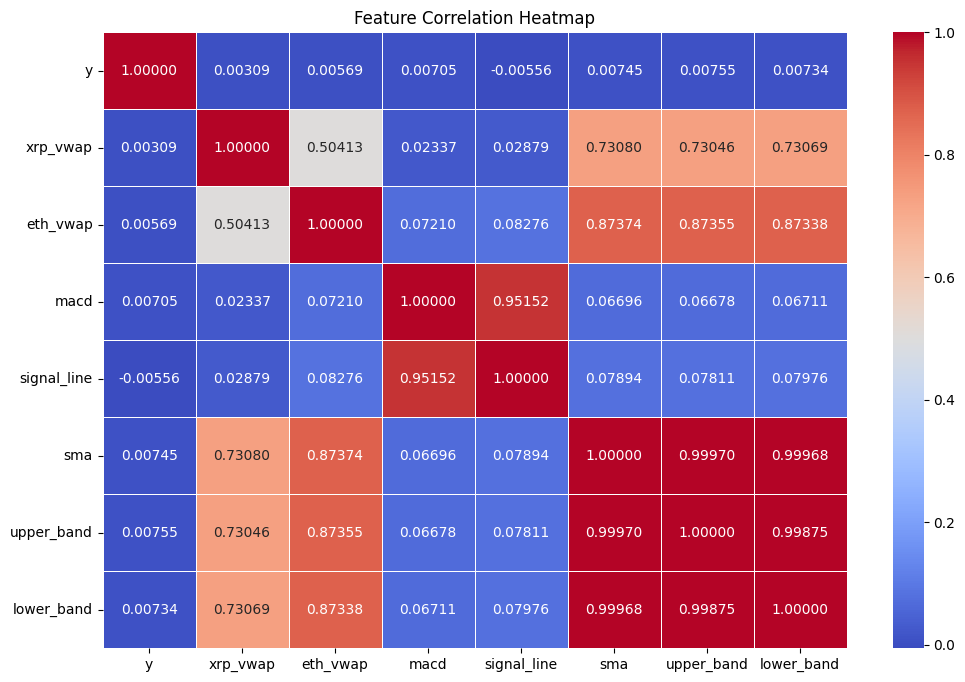

In [ ]:
corr = df4[['y', 'xrp_vwap', 'eth_vwap', 'macd', 'signal_line', 'sma', 'upper_band', 'lower_band']].corr()
# 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".5f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
#df4.to_csv('/content/drive/My Drive/DCU/Practicum/lstm/cryptocurrency/after_fe.csv')

In [ ]:
df4

,close,xrp_vwap,eth_vwap,macd,signal_line,sma,upper_band,lower_band,y
timestamp,,,,,,,,,
2022-02-14 09:00:00,42079.28,0.789190,2860.060337,-99.848513,-121.887069,42148.337833,42621.664279,41675.011387,1
2022-02-14 10:00:00,42237.62,0.789136,2860.683520,-87.379136,-114.944501,42131.515833,42576.298912,41686.732754,1
2022-02-14 11:00:00,42132.13,0.789170,2861.301491,-75.183328,-106.954534,42108.727833,42487.728302,41729.727364,0
2022-02-14 12:00:00,42564.06,0.790173,2868.380088,-48.335444,-95.186257,42107.898333,42484.303604,41731.493062,1
2022-02-14 13:00:00,42517.32,0.791054,2876.725693,-13.988806,-78.897537,42122.876667,42542.908537,41702.844796,0
...,...,...,...,...,...,...,...,...,...
2025-02-12 08:00:00,96350.00,2.402512,2603.661341,-347.157060,-424.541656,95987.200000,97116.773752,94857.626248,1
2025-02-12 09:00:00,96125.00,2.404548,2605.944509,-303.686354,-400.370596,95938.716667,96935.371851,94942.061482,0
2025-02-12 10:00:00,95977.00,2.404944,2608.004687,-277.388568,-375.774190,95891.583333,96763.816386,95019.350281,0


In [ ]:
df4.shape

(26260, 9)

In [ ]:
df3.head()

,open,high,low,close,volume,xrp_vwap,eth_vwap,tp,ema12,ema26,macd,signal_line,sma,std,upper_band,lower_band
timestamp,,,,,,,,,,,,,,,,
2022-02-14 08:00:00,42337.26,42438.52,42010.37,42044.94,56.369935,0.791332,2860.850895,42164.610000,42094.273727,42201.455031,-107.181304,-127.447998,42169.888167,250.000006,42669.888178,41669.888155
2022-02-14 09:00:00,42025.77,42233.52,41947.21,42079.28,217.707225,0.789190,2860.060337,42086.670000,42093.103923,42192.952436,-99.848513,-121.887069,42148.337833,236.663223,42621.664279,41675.011387
2022-02-14 10:00:00,42080.87,42297.12,41935.36,42237.62,24.379766,0.789136,2860.683520,42156.700000,42102.887935,42190.267071,-87.379136,-114.944501,42131.515833,222.391539,42576.298912,41686.732754
2022-02-14 11:00:00,42257.62,42295.21,42096.56,42132.13,29.536714,0.789170,2861.301491,42174.633333,42113.925688,42189.109016,-75.183328,-106.954534,42108.727833,189.500235,42487.728302,41729.727364
2022-02-14 12:00:00,42119.28,42616.29,41961.66,42564.06,68.559400,0.790173,2868.380088,42380.670000,42154.963275,42203.298719,-48.335444,-95.186257,42107.898333,188.202636,42484.303604,41731.493062


In [ ]:
df3['y'] = df3['close'].diff().apply(lambda x: 1 if x > 0 else 0)
df3['y_target'] = df3['y'].shift(-1)

<ipython-input-38-c27111817e36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['y'] = df3['close'].diff().apply(lambda x: 1 if x > 0 else 0)
<ipython-input-38-c27111817e36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['y_target'] = df3['y'].shift(-1)


In [ ]:
df3.head()

,open,high,low,close,volume,xrp_vwap,eth_vwap,tp,ema12,ema26,macd,signal_line,sma,std,upper_band,lower_band,y,y_target
timestamp,,,,,,,,,,,,,,,,,,
2022-02-14 08:00:00,42337.26,42438.52,42010.37,42044.94,56.369935,0.791332,2860.850895,42164.610000,42094.273727,42201.455031,-107.181304,-127.447998,42169.888167,250.000006,42669.888178,41669.888155,0,1.0
2022-02-14 09:00:00,42025.77,42233.52,41947.21,42079.28,217.707225,0.789190,2860.060337,42086.670000,42093.103923,42192.952436,-99.848513,-121.887069,42148.337833,236.663223,42621.664279,41675.011387,1,1.0
2022-02-14 10:00:00,42080.87,42297.12,41935.36,42237.62,24.379766,0.789136,2860.683520,42156.700000,42102.887935,42190.267071,-87.379136,-114.944501,42131.515833,222.391539,42576.298912,41686.732754,1,0.0
2022-02-14 11:00:00,42257.62,42295.21,42096.56,42132.13,29.536714,0.789170,2861.301491,42174.633333,42113.925688,42189.109016,-75.183328,-106.954534,42108.727833,189.500235,42487.728302,41729.727364,0,1.0
2022-02-14 12:00:00,42119.28,42616.29,41961.66,42564.06,68.559400,0.790173,2868.380088,42380.670000,42154.963275,42203.298719,-48.335444,-95.186257,42107.898333,188.202636,42484.303604,41731.493062,1,0.0


In [ ]:
tree_df = df3.iloc[1:]
tree_df = df3.iloc[:-1]
tree_df.head()

,open,high,low,close,volume,xrp_vwap,eth_vwap,tp,ema12,ema26,macd,signal_line,sma,std,upper_band,lower_band,y,y_target
timestamp,,,,,,,,,,,,,,,,,,
2022-02-14 08:00:00,42337.26,42438.52,42010.37,42044.94,56.369935,0.791332,2860.850895,42164.610000,42094.273727,42201.455031,-107.181304,-127.447998,42169.888167,250.000006,42669.888178,41669.888155,0,1.0
2022-02-14 09:00:00,42025.77,42233.52,41947.21,42079.28,217.707225,0.789190,2860.060337,42086.670000,42093.103923,42192.952436,-99.848513,-121.887069,42148.337833,236.663223,42621.664279,41675.011387,1,1.0
2022-02-14 10:00:00,42080.87,42297.12,41935.36,42237.62,24.379766,0.789136,2860.683520,42156.700000,42102.887935,42190.267071,-87.379136,-114.944501,42131.515833,222.391539,42576.298912,41686.732754,1,0.0
2022-02-14 11:00:00,42257.62,42295.21,42096.56,42132.13,29.536714,0.789170,2861.301491,42174.633333,42113.925688,42189.109016,-75.183328,-106.954534,42108.727833,189.500235,42487.728302,41729.727364,0,1.0
2022-02-14 12:00:00,42119.28,42616.29,41961.66,42564.06,68.559400,0.790173,2868.380088,42380.670000,42154.963275,42203.298719,-48.335444,-95.186257,42107.898333,188.202636,42484.303604,41731.493062,1,0.0


In [ ]:
tree_df.shape

(26260, 18)

In [ ]:
tree_features = ['open', 'high', 'low', 'close', 'volume', 'xrp_vwap', 'eth_vwap', 'macd', 'signal_line', 'sma', 'upper_band', 'lower_band', 'y_target']
filtered_tree_df = tree_df[tree_features]

In [ ]:
filtered_tree_df.head()

,open,high,low,close,volume,xrp_vwap,eth_vwap,macd,signal_line,sma,upper_band,lower_band,y_target
timestamp,,,,,,,,,,,,,
2022-02-14 08:00:00,42337.26,42438.52,42010.37,42044.94,56.369935,0.791332,2860.850895,-107.181304,-127.447998,42169.888167,42669.888178,41669.888155,1.0
2022-02-14 09:00:00,42025.77,42233.52,41947.21,42079.28,217.707225,0.789190,2860.060337,-99.848513,-121.887069,42148.337833,42621.664279,41675.011387,1.0
2022-02-14 10:00:00,42080.87,42297.12,41935.36,42237.62,24.379766,0.789136,2860.683520,-87.379136,-114.944501,42131.515833,42576.298912,41686.732754,0.0
2022-02-14 11:00:00,42257.62,42295.21,42096.56,42132.13,29.536714,0.789170,2861.301491,-75.183328,-106.954534,42108.727833,42487.728302,41729.727364,1.0
2022-02-14 12:00:00,42119.28,42616.29,41961.66,42564.06,68.559400,0.790173,2868.380088,-48.335444,-95.186257,42107.898333,42484.303604,41731.493062,0.0


In [ ]:
filtered_tree_df.to_csv()